In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv("EV_Dataset.csv")

In [51]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [52]:
df.shape

(96845, 8)

In [53]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [54]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [55]:
df_clean = df.dropna(subset=['Year', 'Month_Name','State', 'Vehicle_Category', 'EV_Sales_Quantity'])

In [56]:
df_clean

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [57]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

In [58]:
state_sales.head()

,State,EV_Sales_Quantity
0,Andaman & Nicobar Island,202.0
1,Andhra Pradesh,77356.0
2,Arunachal Pradesh,40.0
3,Assam,151917.0
4,Bihar,213465.0


In [59]:
scaler = StandardScaler()
scaled_sales = scaler.fit_transform(state_sales[['EV_Sales_Quantity']])

In [60]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_sales)
    inertia.append(kmeans.inertia_)

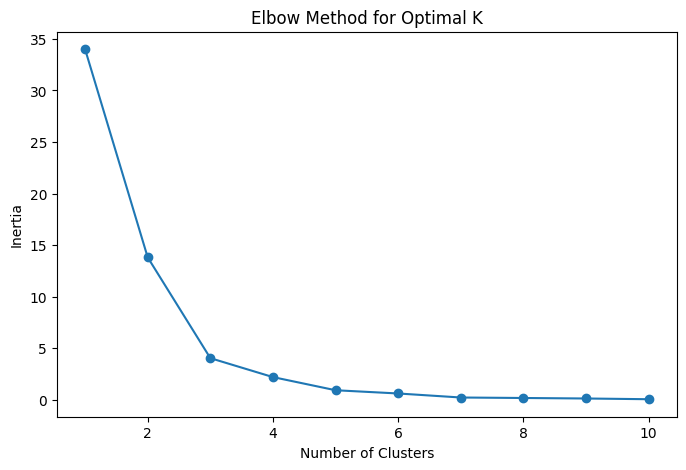

In [61]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=4, random_state=42)
state_sales['Cluster'] = kmeans.fit_predict(scaled_sales)

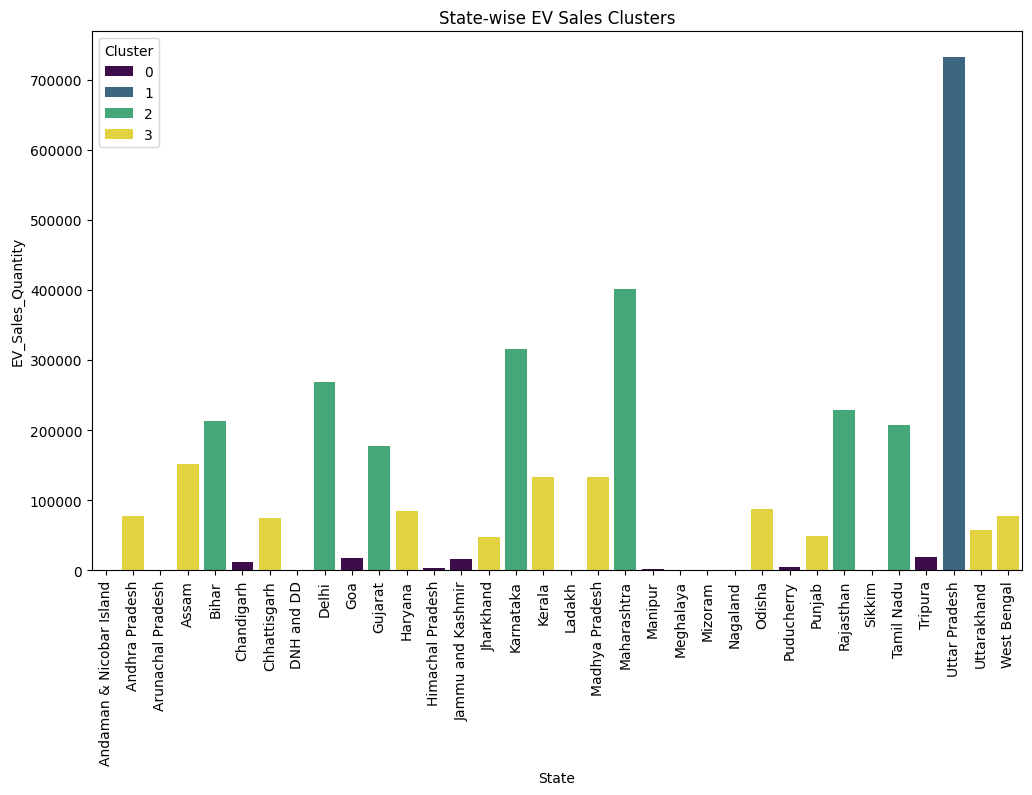

In [63]:
plt.figure(figsize=(12,7))
sns.barplot(x='State', y='EV_Sales_Quantity', hue='Cluster', data=state_sales, palette='viridis')
plt.title('State-wise EV Sales Clusters')
plt.xticks(rotation=90)
plt.show()

In [64]:
state_sales.sort_values('Cluster').tail()

,State,EV_Sales_Quantity,Cluster
6,Chhattisgarh,75275.0,3
3,Assam,151917.0,3
1,Andhra Pradesh,77356.0,3
24,Odisha,86823.0,3
33,West Bengal,78112.0,3


In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

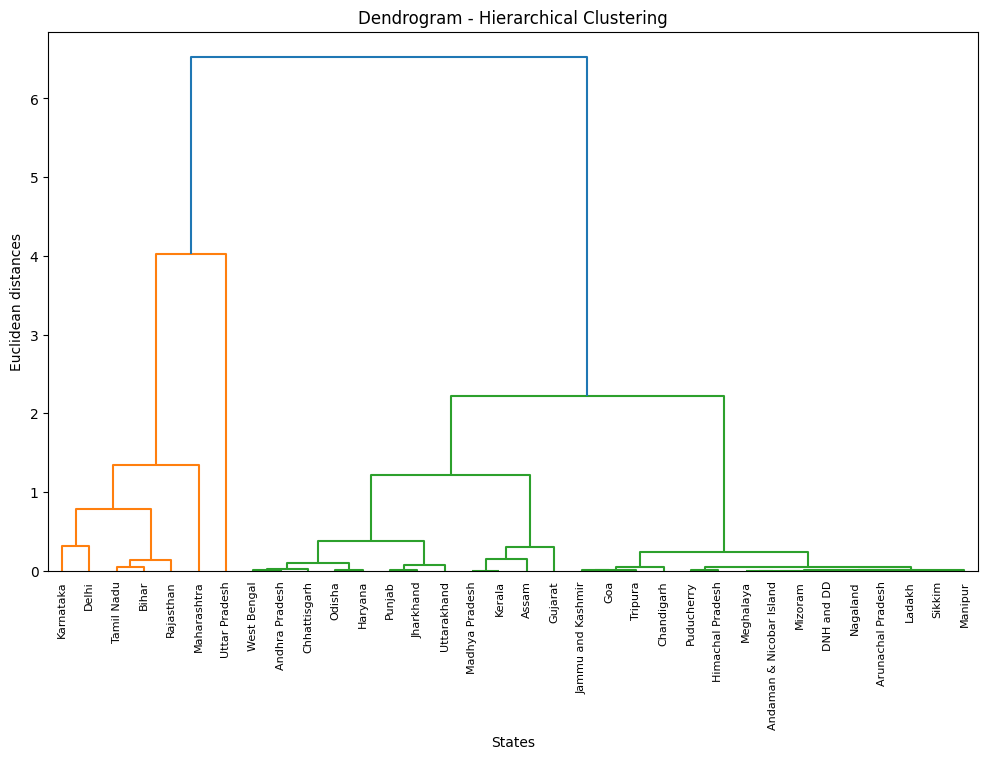

In [66]:
linked = linkage(scaled_sales, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked,labels=state_sales['State'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)

plt.show()